### mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/300/'

os.chdir(current_path)

Mounted at /content/drive


### load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(current_path)


interval = '30m'
interval = '1m'
date_path = './candlestick_concated/%s/2021-04-27/' % interval
date_path = './candlestick_concated/%s/2021-05-17/' % interval
date_path = './candlestick_concated/%s/2021-06-14/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-06-14 BTCUSDT.xlsx', '2021-06-14 ETHUSDT.xlsx', '2021-06-14 BCHUSDT.xlsx', '2021-06-14 XRPUSDT.xlsx', '2021-06-14 EOSUSDT.xlsx', '2021-06-14 LTCUSDT.xlsx', '2021-06-14 ETCUSDT.xlsx', '2021-06-14 LINKUSDT.xlsx', '2021-06-14 XLMUSDT.xlsx', '2021-06-14 ADAUSDT.xlsx', '2021-06-14 XMRUSDT.xlsx', '2021-06-14 SXPUSDT.xlsx', '2021-06-14 KAVAUSDT.xlsx', '2021-06-14 BANDUSDT.xlsx', '2021-06-14 DASHUSDT.xlsx', '2021-06-14 ZECUSDT.xlsx', '2021-06-14 XTZUSDT.xlsx', '2021-06-14 BNBUSDT.xlsx', '2021-06-14 ATOMUSDT.xlsx', '2021-06-14 ONTUSDT.xlsx', '2021-06-14 IOTAUSDT.xlsx', '2021-06-14 BATUSDT.xlsx', '2021-06-14 NEOUSDT.xlsx', '2021-06-14 QTUMUSDT.xlsx', '2021-06-14 WAVESUSDT.xlsx', '2021-06-14 MKRUSDT.xlsx', '2021-06-14 SNXUSDT.xlsx', '2021-06-14 DOTUSDT.xlsx', '2021-06-14 THETAUSDT.xlsx', '2021-06-14 ALGOUSDT.xlsx', '2021-06-14 KNCUSDT.xlsx', '2021-06-14 ZRXUSDT.xlsx', '2021-06-14 COMPUSDT.xlsx', '2021-06-14 OMGUSDT.xlsx']


### weather data

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13574144/13568290 [==============================] - 0s 0us/step


In [ ]:
df = pd.read_csv(csv_path)
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

In [ ]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

### basic fishing (not concerned about rapid descending)

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
lvrg_list = range(6, 10)
lvrg_list = range(1, 2)
lvrg_list = range(5, 6)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  # if 'dot'.upper() not in candis[i]:
  #   continue
  
  # if 'btc'.upper() not in candis[i]:
  #   continue

  if 'eth'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

    #     find best lvrg with lq    #
    # for lvrg in lvrg_list:
      
    #   #       tp opt      #
    #   best_tp = None
    #   best_ap = 0
    #   best_pr = None

    #   #        find best tp       #
    #   for tp in tp_list:

    #     long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

    #     #       long      #
    #     pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
    #     #     set condition   #
    #     pr = np.where(ohlcv['low'] < long_ep, pr, 1)
      
    #     lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

    #     # plt.plot(np.cumprod(pr))
    #     # plt.show()
    #     # break

    #     #       short       #
    #     # s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1

    #     #       fill na with 1.0      #
    #     pr = np.where(np.isnan(pr), 1, pr)
    #     # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
    #     lq = np.where(np.isnan(lq), 1, lq)
    #     # s_pr = np.where(np.isnan(s_pr), 1, pr)

    #     #       set lq      #
    #     pr = np.where((pr != 1) & (lq <= 0), 0, pr)
    #     # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

    #     # plt.plot(np.cumprod(pr))
    #     # plt.title("%.3f" % tp)
    #     # plt.show()
    #     # plt.close()

    #     ap = np.cumprod(pr)[-1]
    #     if ap >= best_ap:
    #       best_ep = long_ep
    #       best_ap = ap
    #       best_tp = tp
    #       best_pr = pr

      # best_pr = np.array(best_pr)
      # org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

      # # plt.figure(figsize=(10, 4))
      # plt.figure(figsize=(6, 4))
      # # plt.subplot(121)
      # plt.plot(np.cumprod(best_pr))
      # plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))

      
      # #     avoid dropping    #      
      # # ema = ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
      # # # avoid_pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), test_pr, 1)

      # # avoid_pr = np.where(ema.shift(1) > ema.shift(2), best_pr, 1)

      # # # ma = ohlcv['close'].rolling(120).mean()
      # # # avoid_pr = np.where(ma.shift(1) > ma.shift(2), best_pr, 1)

      # # avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

      
      # # plt.subplot(122)
      # # plt.plot(np.cumprod(avoid_pr))
      # # plt.title("%s\navoid_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, avoid_wr, np.cumprod(avoid_pr)[-1], best_tp, lvrg))

      # plt.show()








start_stamp : 0


len(ohlcv) : 28800



### setup

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### check data

In [ ]:
df = ohlcv
print(df.head())

# sar = lucid_sar(ohlcv)
# ha_ohlc = heikinashi(ohlcv).iloc[:, :4]
# ema1, ema2, ema3 = ema_ribbon(ohlcv)
# senkou1, senkou2 = ichimoku(ohlcv)
# cbo, ema_cbo = cct_bbo(ohlcv, 21, 13) 

# _, _, bbw = bb_width(ohlcv, 20, 2) 

df['fish60'] = fisher(ohlcv, 60)
df['trix'] = trix_hist(ohlcv, 14, 1, 5) 
# rsi_ = rsi(ohlcv)
df['macd_hist'] = macd(ohlcv)

df.describe().transpose()

                            open     high      low    close     volume
2021-05-26 00:00:59.999  2583.77  2599.88  2582.20  2591.77   8062.327
2021-05-26 00:01:59.999  2591.93  2593.96  2576.42  2577.64   9026.337
2021-05-26 00:02:59.999  2577.69  2581.89  2569.00  2570.60   6497.376
2021-05-26 00:03:59.999  2570.77  2574.75  2556.50  2567.54  15777.992
2021-05-26 00:04:59.999  2567.69  2574.64  2556.00  2556.16   8791.288


,count,mean,std,min,25%,50%,75%,max
open,28800.0,2577.485357,157.322409,2186.390000,2456.027500,2574.020000,2709.872500,2906.070000
high,28800.0,2580.807443,157.406624,2190.520000,2459.167500,2577.965000,2713.262500,2913.000000
low,28800.0,2574.295627,157.246560,2179.130000,2453.070000,2570.535000,2706.580000,2897.740000
close,28800.0,2577.483710,157.322151,2186.530000,2456.017500,2574.005000,2709.880000,2906.140000
volume,28800.0,2691.152816,2566.687819,75.794000,1212.860000,1967.102000,3237.207250,50401.397000
fish60,28741.0,0.065585,1.950788,-7.599680,-1.302415,0.081680,1.394614,7.589148
trix,28795.0,0.000005,0.004491,-0.028380,-0.002612,-0.000078,0.002550,0.027977
macd_hist,28776.0,-0.001588,1.491717,-9.997597,-0.860877,-0.030479,0.845549,9.689452


### remove nan data

In [ ]:
print((np.isnan(df.values)))
print(np.sum(np.isnan(df.values), axis=0))

max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
print(max_nan)

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[ 0  0  0  0  0 59  5 24]
59


In [ ]:
df = df.iloc[max_nan:]

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,28741.0,2577.472558,157.480481,2186.390000,2455.640000,2573.910000,2710.000000,2906.070000
high,28741.0,2580.783939,157.564306,2190.520000,2458.990000,2577.780000,2713.460000,2913.000000
low,28741.0,2574.292537,157.404736,2179.130000,2452.800000,2570.500000,2706.790000,2897.740000
close,28741.0,2577.470435,157.480179,2186.530000,2455.640000,2573.900000,2710.000000,2906.140000
volume,28741.0,2681.062857,2551.639306,75.794000,1210.926000,1964.114000,3228.418000,50401.397000
fish60,28741.0,0.065585,1.950788,-7.599680,-1.302415,0.081680,1.394614,7.589148
trix,28741.0,-0.000002,0.004459,-0.028380,-0.002614,-0.000081,0.002539,0.027585
macd_hist,28741.0,-0.000646,1.485222,-9.997597,-0.859800,-0.030626,0.843995,9.689452


### macd gaussian survey

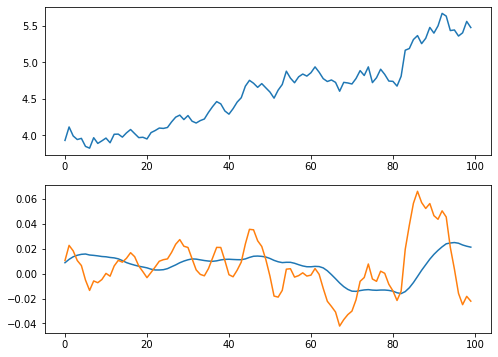

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d


g_curve = [np.nan] * len(df)
period = 20
sigma = 20

for i in range(period, len(df)):

  macd_hist = df['macd_hist'].values[i + 1 - period:i + 1]
  macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  g_curve[i] = macd_hist_g[-1] 

plot_size = 100

plt.subplot(211)
plt.plot(df['close'].values[period:][:plot_size])

plt.subplot(212) 
plt.plot(g_curve[period:][:plot_size])
plt.plot(df['macd_hist'].values[period:][:plot_size])

plt.show()

#### pr survey on gaussina macd

12777
12777
12777


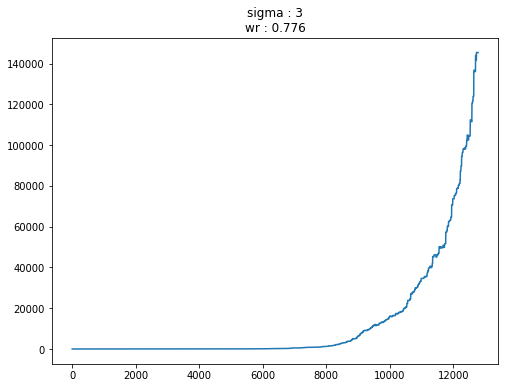

In [ ]:

g_curve = [np.nan] * len(df)
period = 20
sigma = 20

# for sigma in range(10, 50, 2):
# for sigma in range(1, 10, 1):
for sigma in range(3, 4, 1):

  #     realtime gaussian   #
  # for i in range(period, len(df)):

  #   macd_hist = df['macd_hist'].values[i + 1 - period:i + 1]
  #   macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  #   g_curve[i] = macd_hist_g[-1] 

  #     non realtime    #
  macd_hist = df['macd_hist'].values
  macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  g_curve = macd_hist_g

  g_curve_series = pd.Series(g_curve[period:])
  # print(g_curve_series.head())
  # break

  short_sig = np.where((g_curve_series.shift(1) < g_curve_series.shift(2)) &
                      (g_curve_series.shift(2) > g_curve_series.shift(3)), 1, 0)

  long_sig = np.where((g_curve_series.shift(1) > g_curve_series.shift(2)) &
                      (g_curve_series.shift(2) < g_curve_series.shift(3)), 1, 0)
  # print(short_sig)
  # break


  # print(np.argwhere(short_sig == 1).reshape(-1, ))
  # break

  short_sig_arg = np.argwhere(short_sig == 1).reshape(-1, )
  long_sig_arg = np.argwhere(long_sig == 1).reshape(-1, )
  print(len(long_sig))
  print(len(short_sig))

  close = df['close'].values[period:]
  print(len(close))
  # break

  #       1. check long version first    #
  #       2. entry long signal on close    #
  lvrg = 1
  fee = 0.0006
  pr_list = []

  for i in range(len(long_sig)):
    
    if long_sig[i]:

      ep = close[i]

      for j in range(i + 1, len(long_sig)):

        if short_sig[j]:

          pr = (close[j] / ep - 1 - fee) * lvrg + 1
          # print(pr)
          break

    else:

      pr = 1

    pr_list.append(pr)

  pr_list = np.array(pr_list)
  wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

  plt.plot(np.cumprod(pr_list))
  plt.title("sigma : %s\nwr : %.3f" % (sigma, wr))
  plt.show()



  


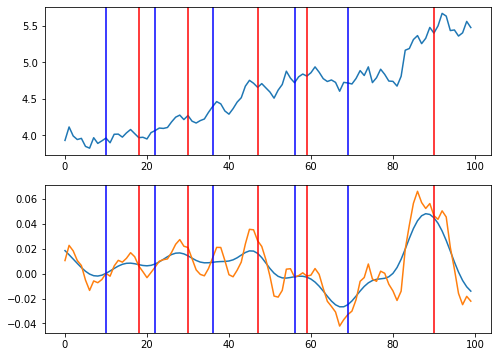

In [ ]:
g_curve_series = pd.Series(g_curve[period:])
# print(g_curve_series.head())
# break

short_sig = np.where((g_curve_series.shift(1) < g_curve_series.shift(2)) &
                    (g_curve_series.shift(2) > g_curve_series.shift(3)), 1, 0)

long_sig = np.where((g_curve_series.shift(1) > g_curve_series.shift(2)) &
                    (g_curve_series.shift(2) < g_curve_series.shift(3)), 1, 0)
# print(short_sig)
# break


# print(np.argwhere(short_sig == 1).reshape(-1, ))
# break

short_sig_arg = np.argwhere(short_sig == 1).reshape(-1, )
long_sig_arg = np.argwhere(long_sig == 1).reshape(-1, )

plot_size = 100

plt.subplot(211)
plt.plot(df['close'].values[period:][:plot_size])

for x_i in long_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='b')

for x_i in short_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='r')

plt.subplot(212) 
plt.plot(g_curve[period:][:plot_size])
plt.plot(df['macd_hist'].values[period:][:plot_size])

for x_i in long_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='b')

for x_i in short_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='r')


plt.show()

### time survey

In [ ]:
timestamp_s = df.index.map(datetime.datetime.timestamp)

# print(timestamp_s)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

print(df.head())

plt.plot(np.array(df['Day sin'])[:250])
plt.plot(np.array(df['Day cos'])[:250])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

### target column

In [ ]:
target = "close"
target = "macd_hist"
# target = 'T (degC)'

#### fft

In [ ]:
fft = tf.signal.rfft(df[target])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[target])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
# plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### data proc

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print("num_features :", num_features)
print("column_indices :", column_indices)

num_features : 12
column_indices : {'open': 0, 'high': 1, 'low': 2, 'close': 3, 'volume': 4, 'fish60': 5, 'trix': 6, 'macd_hist': 7, 'Day sin': 8, 'Day cos': 9, 'Year sin': 10, 'Year cos': 11}


### scaling

In [ ]:
# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

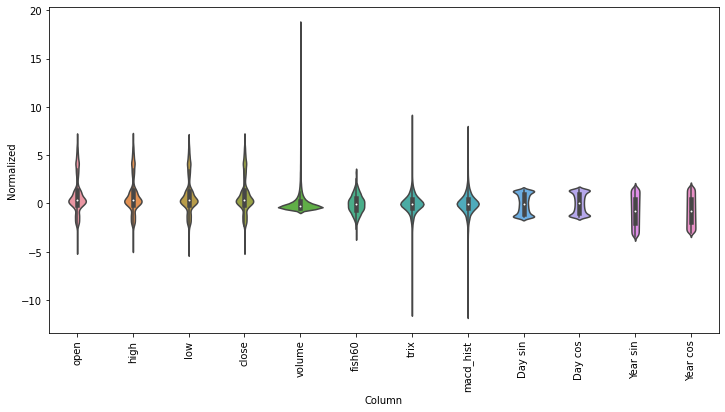

In [ ]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

### windowing + retrain

In [ ]:
data_x, data_labels = [], []
close_x, label_close_x = [], []
data_index = []

input_size = 96
label_size = 24

# input_size = 12
# label_size = 12

test_df_copy = test_df.copy()

# train_mean = train_df.mean()
# train_std = train_df.std()
# df_std = (df - train_mean) / train_std

column_indices = {name: i for i, name in enumerate(df.columns)}
num_features = df.shape[1]
print("num_features :", num_features)
print("column_indices :", column_indices)

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
min_max = MinMaxScaler()
std_scale = StandardScaler()

def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

#       local scaling     #
for i in range(input_size, len(df) - label_size):
    
    # temp_data = df.values[i - input_size:i]
    # temp_labels = df.values[i:i + label_size]

    # scaled_data = min_max_scale(df.values[i - input_size:i + label_size])
    # scaled_data = min_max.fit_transform(df.values[i - input_size:i + label_size])
    # temp_data = scaled_data[:input_size]
    # temp_labels = scaled_data[input_size:]

    
    # temp_data = min_max.fit_transform(df.values[i - input_size:i])
    # temp_labels = min_max.transform(df.values[i:i + label_size])

    temp_data = std_scale.fit_transform(df.values[i - input_size:i])
    temp_labels = std_scale.transform(df.values[i:i + label_size])

    # print(df.index[i - input_size:i][-1])
    # print(df.index[i:i + label_size][0])
    # print()

    if np.isnan(np.sum(temp_data)):
      continue

    data_x.append(temp_data)
    data_labels.append(temp_labels)
    close_x.append(df.values[i - input_size:i, [3]])
    label_close_x.append(df.values[i:i + label_size, [3]])


data_x = np.array(data_x).astype(np.float32)

#       for conv2d      #
# data_x = np.array(data_x).astype(np.float32)
# data_x = np.expand_dims(data_x, axis=-1)

close_x = np.array(close_x)
label_close_x = np.array(label_close_x)
print("close_x.shape :", close_x.shape)

#         feature selection       #
# close_x = close_x[-len(test_df):]
# label_close_x = label_close_x[-len(test_df):]
data_x = data_x[:, :, [7]]
# data_x = data_x[:, :, [0, 1, 2, 3, 7]]
# data_x = data_x[:, :, :]

data_labels = np.array(data_labels).astype(np.float32)

# print(len(df) - total_window_size)
print("data_x.shape :", data_x.shape)
print("data_labels.shape :", data_labels.shape)

print("data_x.dtype :", data_x.dtype)
print("data_labels.dtype :", data_labels.dtype)

num_features : 12
column_indices : {'open': 0, 'high': 1, 'low': 2, 'close': 3, 'volume': 4, 'fish60': 5, 'trix': 6, 'macd_hist': 7, 'Day sin': 8, 'Day cos': 9, 'Year sin': 10, 'Year cos': 11}
close_x.shape : (28621, 96, 1)
data_x.shape : (28621, 96, 1)
data_labels.shape : (28621, 24, 12)
data_x.dtype : float32
data_labels.dtype : float32


### multi step - models

In [ ]:
MAX_EPOCHS = 100
MAX_EPOCHS = 200
# MAX_EPOCHS = 50

patience = MAX_EPOCHS // 5
# patience = 2

ckpt_path = current_path + 'ckpt/'

def compile_and_fit(model, model_name, train_x, train_y, val_x, val_y, patience=patience):

  tf.keras.backend.clear_session()

  checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path + model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                # optimizer=tf.optimizers.Adam(learning_rate=1e-4, decay=1e-5),
                optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
                metrics=[tf.metrics.MeanAbsoluteError()])
  

  history = model.fit(train_x, train_y, epochs=MAX_EPOCHS,
                      validation_data=(val_x, val_y),
                      callbacks=[checkpoint, early_stopping],
                      # callbacks=[early_stopping],
                      batch_size=32)
  return history

#### cnn

In [ ]:
CONV_WIDTH = 12

def conv_model():

  # CONV_WIDTH = 3
  # CONV_WIDTH = input_size
  multi_conv_model = tf.keras.Sequential([
      # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
      tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
      # Shape => [batch, 1, conv_units]
      tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
      # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
      # Shape => [batch, 1,  out_steps*features]
      tf.keras.layers.Dense(label_size*num_features,
                            kernel_initializer=tf.initializers.zeros()),
      # Shape => [batch, label_size, features]
      tf.keras.layers.Reshape([label_size, num_features])
  ])

  return multi_conv_model


len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 4ms/step - loss: 1.2143 - mean_absolute_error: 0.8214 - val_loss: 1.0204 - val_mean_absolute_error: 0.7606

Epoch 00001: val_loss improved from inf to 1.02035, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_10000.h5
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 1.1548 - mean_absolute_error: 0.7940 - val_loss: 1.0145 - val_mean_absolute_error: 0.7568

Epoch 00002: val_loss improved from 1.02035 to 1.01452, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_10000.h5
Epoch 3/200
219/219 [=========================

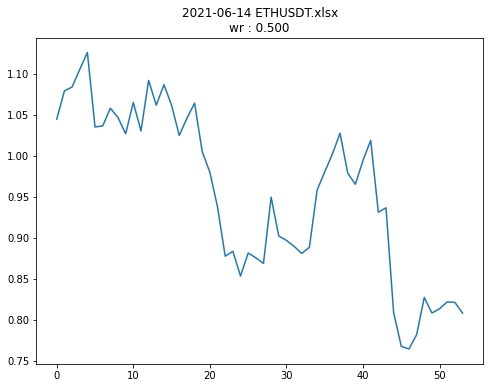

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 1s 4ms/step - loss: 1.1975 - mean_absolute_error: 0.8155 - val_loss: 1.1153 - val_mean_absolute_error: 0.7977

Epoch 00001: val_loss improved from inf to 1.11525, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_11000.h5
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 1.1389 - mean_absolute_error: 0.7883 - val_loss: 1.1001 - val_mean_absolute_error: 0.7893

Epoch 00002: val_loss improved from 1.11525 to 1.10005, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_11000.h5
Epoch 3/200
219/219 [=========================

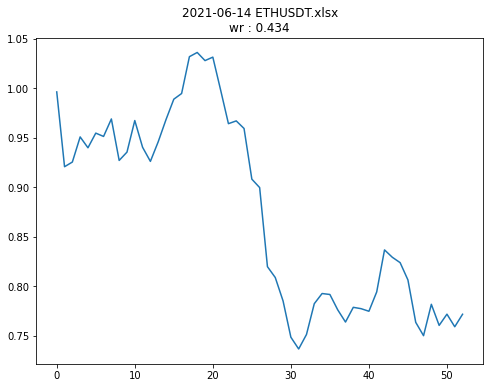

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 1s 4ms/step - loss: 1.1928 - mean_absolute_error: 0.8117 - val_loss: 1.1476 - val_mean_absolute_error: 0.8179

Epoch 00001: val_loss improved from inf to 1.14763, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_12000.h5
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 1.1358 - mean_absolute_error: 0.7850 - val_loss: 1.1446 - val_mean_absolute_error: 0.8141

Epoch 00002: val_loss improved from 1.14763 to 1.14461, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_12000.h5
Epoch 3/200
219/219 [=========================

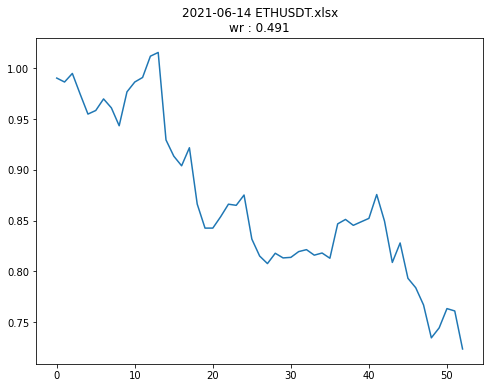

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 5ms/step - loss: 1.2024 - mean_absolute_error: 0.8175 - val_loss: 1.1083 - val_mean_absolute_error: 0.8045

Epoch 00001: val_loss improved from inf to 1.10826, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_13000.h5
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 1.1498 - mean_absolute_error: 0.7911 - val_loss: 1.0959 - val_mean_absolute_error: 0.7994

Epoch 00002: val_loss improved from 1.10826 to 1.09588, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_13000.h5
Epoch 3/200
219/219 [=========================

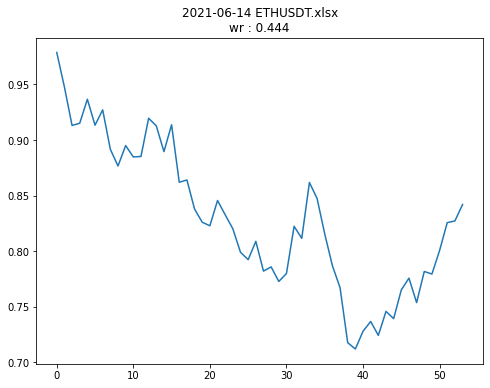

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 1s 4ms/step - loss: 1.1545 - mean_absolute_error: 0.8105 - val_loss: 1.0147 - val_mean_absolute_error: 0.7718

Epoch 00001: val_loss improved from inf to 1.01475, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_14000.h5
Epoch 2/200
219/219 [==============================] - 1s 4ms/step - loss: 1.1034 - mean_absolute_error: 0.7845 - val_loss: 1.0038 - val_mean_absolute_error: 0.7652

Epoch 00002: val_loss improved from 1.01475 to 1.00385, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_14000.h5
Epoch 3/200
219/219 [=========================

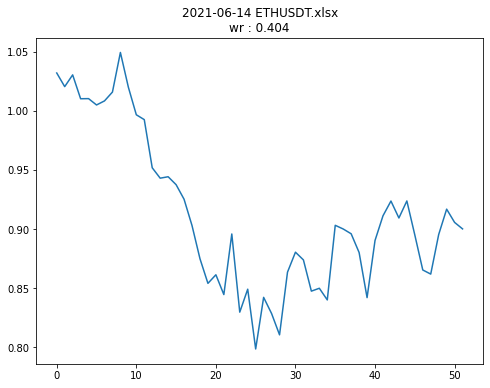

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 1s 4ms/step - loss: 1.1590 - mean_absolute_error: 0.8106 - val_loss: 1.0717 - val_mean_absolute_error: 0.7770

Epoch 00001: val_loss improved from inf to 1.07171, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_15000.h5
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 1.1056 - mean_absolute_error: 0.7846 - val_loss: 1.0631 - val_mean_absolute_error: 0.7732

Epoch 00002: val_loss improved from 1.07171 to 1.06308, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_15000.h5
Epoch 3/200
219/219 [=========================

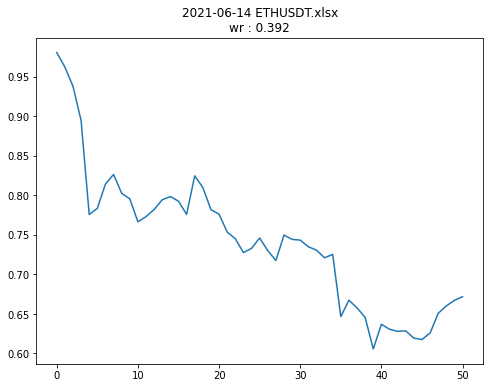

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 1s 4ms/step - loss: 1.0925 - mean_absolute_error: 0.7980 - val_loss: 1.3311 - val_mean_absolute_error: 0.8236

Epoch 00001: val_loss improved from inf to 1.33110, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_16000.h5
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 1.0388 - mean_absolute_error: 0.7707 - val_loss: 1.3215 - val_mean_absolute_error: 0.8193

Epoch 00002: val_loss improved from 1.33110 to 1.32147, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_16000.h5
Epoch 3/200
219/219 [=========================

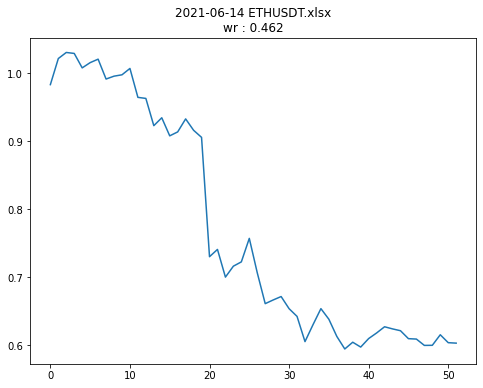

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 5ms/step - loss: 1.1223 - mean_absolute_error: 0.8048 - val_loss: 1.5079 - val_mean_absolute_error: 0.8414

Epoch 00001: val_loss improved from inf to 1.50788, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_17000.h5
Epoch 2/200
219/219 [==============================] - 1s 5ms/step - loss: 1.0699 - mean_absolute_error: 0.7794 - val_loss: 1.5055 - val_mean_absolute_error: 0.8406

Epoch 00002: val_loss improved from 1.50788 to 1.50546, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_17000.h5
Epoch 3/200
219/219 [=========================

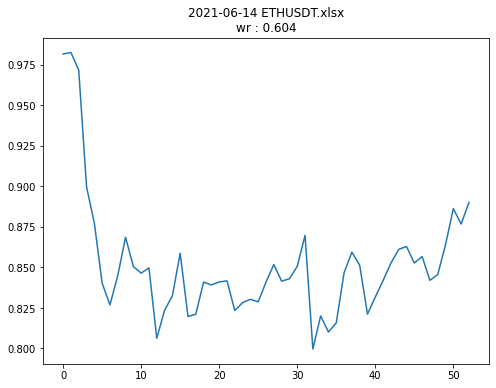

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 6ms/step - loss: 1.1865 - mean_absolute_error: 0.8175 - val_loss: 1.3662 - val_mean_absolute_error: 0.8078

Epoch 00001: val_loss improved from inf to 1.36619, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_18000.h5
Epoch 2/200
219/219 [==============================] - 1s 4ms/step - loss: 1.1310 - mean_absolute_error: 0.7911 - val_loss: 1.3592 - val_mean_absolute_error: 0.8030

Epoch 00002: val_loss improved from 1.36619 to 1.35916, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_18000.h5
Epoch 3/200
219/219 [=========================

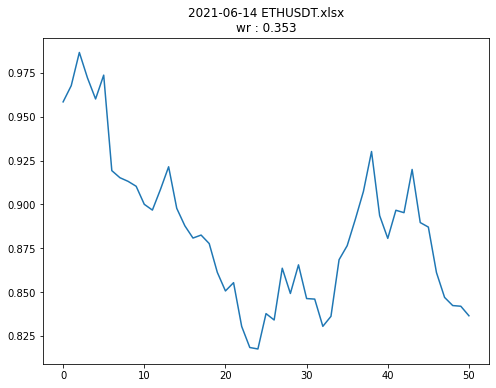

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 7ms/step - loss: 1.2591 - mean_absolute_error: 0.8258 - val_loss: 1.2402 - val_mean_absolute_error: 0.7936

Epoch 00001: val_loss improved from inf to 1.24015, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_19000.h5
Epoch 2/200
219/219 [==============================] - 1s 6ms/step - loss: 1.2017 - mean_absolute_error: 0.8001 - val_loss: 1.2389 - val_mean_absolute_error: 0.7918

Epoch 00002: val_loss improved from 1.24015 to 1.23887, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_19000.h5
Epoch 3/200
219/219 [=========================

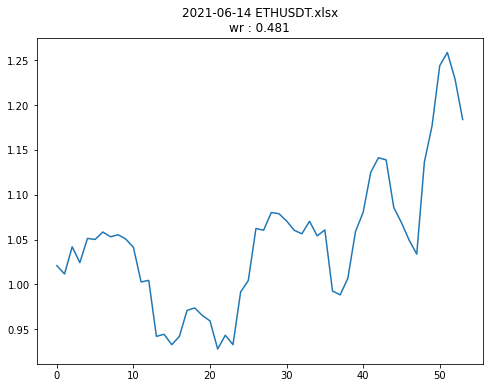

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 7ms/step - loss: 1.2588 - mean_absolute_error: 0.8210 - val_loss: 1.3556 - val_mean_absolute_error: 0.8358

Epoch 00001: val_loss improved from inf to 1.35557, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_20000.h5
Epoch 2/200
219/219 [==============================] - 1s 5ms/step - loss: 1.2063 - mean_absolute_error: 0.7967 - val_loss: 1.3430 - val_mean_absolute_error: 0.8273

Epoch 00002: val_loss improved from 1.35557 to 1.34301, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_20000.h5
Epoch 3/200
219/219 [=========================

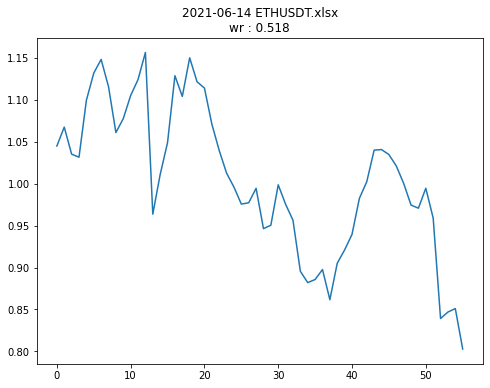

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 6ms/step - loss: 1.2876 - mean_absolute_error: 0.8213 - val_loss: 1.5077 - val_mean_absolute_error: 0.8442

Epoch 00001: val_loss improved from inf to 1.50770, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_21000.h5
Epoch 2/200
219/219 [==============================] - 1s 5ms/step - loss: 1.2317 - mean_absolute_error: 0.7962 - val_loss: 1.4842 - val_mean_absolute_error: 0.8344

Epoch 00002: val_loss improved from 1.50770 to 1.48418, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_21000.h5
Epoch 3/200
219/219 [=========================

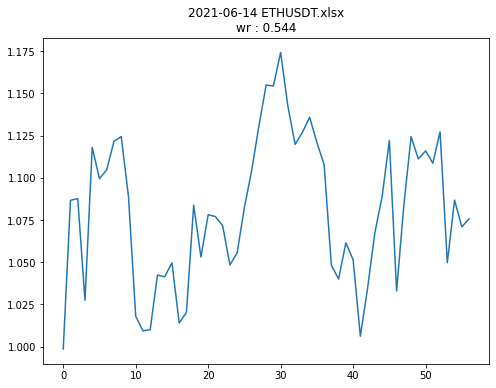

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 6ms/step - loss: 1.3315 - mean_absolute_error: 0.8288 - val_loss: 1.3110 - val_mean_absolute_error: 0.8101

Epoch 00001: val_loss improved from inf to 1.31099, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_22000.h5
Epoch 2/200
219/219 [==============================] - 1s 4ms/step - loss: 1.2746 - mean_absolute_error: 0.8054 - val_loss: 1.2979 - val_mean_absolute_error: 0.8038

Epoch 00002: val_loss improved from 1.31099 to 1.29785, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_22000.h5
Epoch 3/200
219/219 [=========================

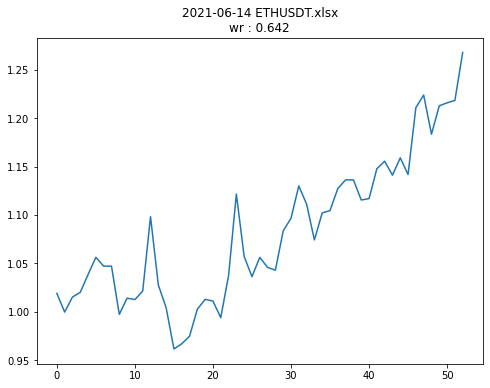

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 5ms/step - loss: 1.4239 - mean_absolute_error: 0.8406 - val_loss: 1.1128 - val_mean_absolute_error: 0.7771

Epoch 00001: val_loss improved from inf to 1.11280, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_23000.h5
Epoch 2/200
219/219 [==============================] - 1s 4ms/step - loss: 1.3662 - mean_absolute_error: 0.8154 - val_loss: 1.1011 - val_mean_absolute_error: 0.7711

Epoch 00002: val_loss improved from 1.11280 to 1.10112, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_23000.h5
Epoch 3/200
219/219 [=========================

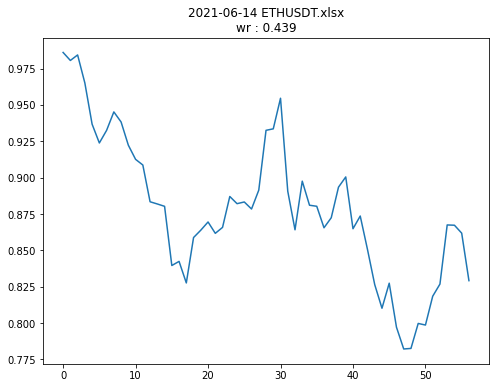

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 7ms/step - loss: 1.3908 - mean_absolute_error: 0.8355 - val_loss: 1.2136 - val_mean_absolute_error: 0.7980

Epoch 00001: val_loss improved from inf to 1.21362, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_24000.h5
Epoch 2/200
219/219 [==============================] - 1s 6ms/step - loss: 1.3363 - mean_absolute_error: 0.8116 - val_loss: 1.2003 - val_mean_absolute_error: 0.7930

Epoch 00002: val_loss improved from 1.21362 to 1.20032, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_24000.h5
Epoch 3/200
219/219 [=========================

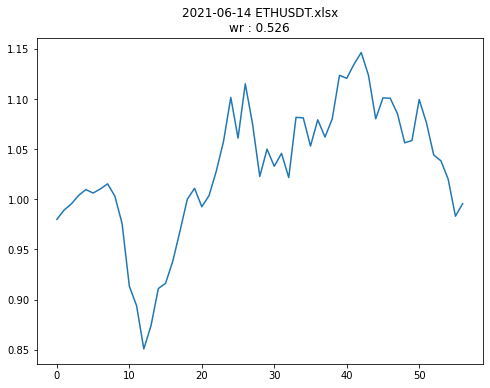

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 3s 8ms/step - loss: 1.3643 - mean_absolute_error: 0.8282 - val_loss: 1.1636 - val_mean_absolute_error: 0.7928

Epoch 00001: val_loss improved from inf to 1.16365, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_25000.h5
Epoch 2/200
219/219 [==============================] - 1s 6ms/step - loss: 1.3057 - mean_absolute_error: 0.8032 - val_loss: 1.1458 - val_mean_absolute_error: 0.7815

Epoch 00002: val_loss improved from 1.16365 to 1.14576, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_25000.h5
Epoch 3/200
219/219 [=========================

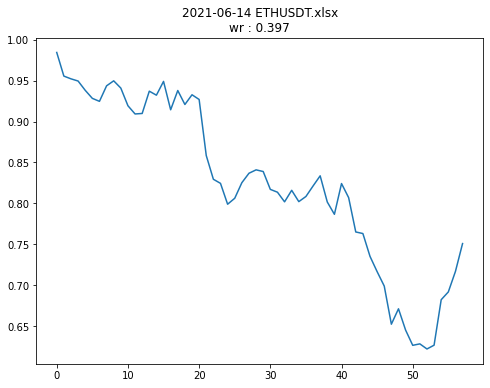

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 6ms/step - loss: 1.3073 - mean_absolute_error: 0.8232 - val_loss: 1.1112 - val_mean_absolute_error: 0.7901

Epoch 00001: val_loss improved from inf to 1.11120, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_26000.h5
Epoch 2/200
219/219 [==============================] - 1s 4ms/step - loss: 1.2540 - mean_absolute_error: 0.7999 - val_loss: 1.1036 - val_mean_absolute_error: 0.7868

Epoch 00002: val_loss improved from 1.11120 to 1.10364, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_26000.h5
Epoch 3/200
219/219 [=========================

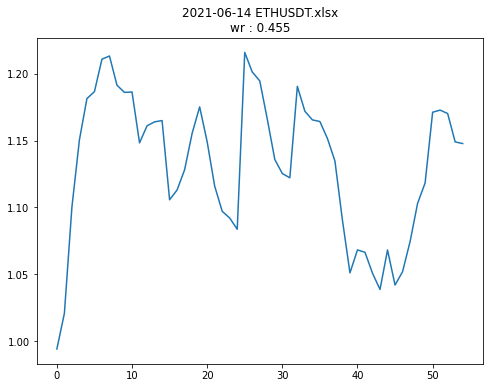

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 7ms/step - loss: 1.2988 - mean_absolute_error: 0.8220 - val_loss: 1.1704 - val_mean_absolute_error: 0.7994

Epoch 00001: val_loss improved from inf to 1.17036, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_27000.h5
Epoch 2/200
219/219 [==============================] - 1s 6ms/step - loss: 1.2459 - mean_absolute_error: 0.7983 - val_loss: 1.1604 - val_mean_absolute_error: 0.7920

Epoch 00002: val_loss improved from 1.17036 to 1.16043, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_27000.h5
Epoch 3/200
219/219 [=========================

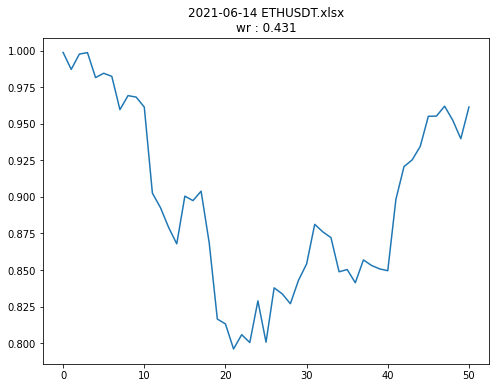

len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
test_slice_close_x.shape : (1000, 96, 1)
test_slice_label_close_x.shape : (1000, 24, 1)
train_labels.shape : (7000, 24, 12)
train_y.shape : (7000, 24, 1)

Epoch 1/200
219/219 [==============================] - 2s 7ms/step - loss: 1.2763 - mean_absolute_error: 0.8260 - val_loss: 1.2956 - val_mean_absolute_error: 0.7835

Epoch 00001: val_loss improved from inf to 1.29564, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_28000.h5
Epoch 2/200
219/219 [==============================] - 1s 6ms/step - loss: 1.2178 - mean_absolute_error: 0.7992 - val_loss: 1.2846 - val_mean_absolute_error: 0.7775

Epoch 00002: val_loss improved from 1.29564 to 1.28455, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_std_2021-06-14 ETHUSDT.xlsx_96_24_12_28000.h5
Epoch 3/200
219/219 [=========================

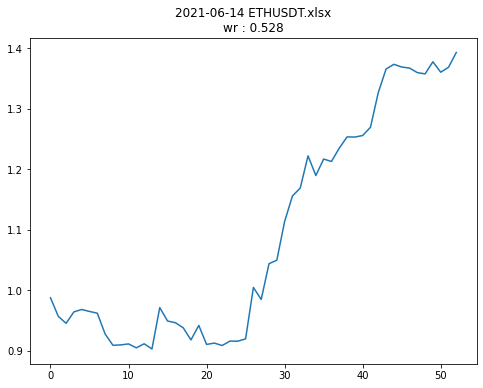

In [ ]:

#         1. data slicing      #
tvt_size = 10000
shift_size = 1000
shift_i = 0

#         2. calc, iteration number     #
# data_len = len(data_x)

target_label = target
target_label_index = column_indices[target_label]

while 1:

  last_index = tvt_size + shift_size * shift_i

  slice_x = data_x[shift_size * shift_i :last_index]
  slice_labels = data_labels[shift_size * shift_i :last_index]
  slice_close_x = close_x[shift_size * shift_i :last_index]
  slice_label_close_x = label_close_x[shift_size * shift_i :last_index]

  if last_index > len(data_x):
    break

  else:
    shift_i += 1


  train_x = slice_x[:int(tvt_size * 0.7)]
  val_x = slice_x[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_x = slice_x[int(tvt_size * 0.9):]

  print("len(train_x) :", len(train_x))
  print("len(val_x) :", len(val_x))
  print("len(test_x) :", len(test_x))

  train_labels = slice_labels[:int(tvt_size * 0.7)]
  val_labels = slice_labels[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_labels = slice_labels[int(tvt_size * 0.9):]

  test_slice_close_x = slice_close_x[int(tvt_size * 0.9):]
  test_slice_label_close_x = slice_label_close_x[int(tvt_size * 0.9):]

  print("test_slice_close_x.shape :", test_slice_close_x.shape)
  print("test_slice_label_close_x.shape :", test_slice_label_close_x.shape)

  train_y = train_labels[:, :, [target_label_index]]
  val_y = val_labels[:, :, [target_label_index]]
  test_y = test_labels[:, :, [target_label_index]]

  print("train_labels.shape :", train_labels.shape)
  print("train_y.shape :", train_y.shape)
  print()


  #         train         #
  model_name = 'multi_step_macdhist_cnn_ohlcmacd_lscale_std_%s_%s_%s_%s_%s.h5' % (key, input_size, label_size, CONV_WIDTH, last_index)
  
  multi_conv_model = conv_model()
  history = compile_and_fit(multi_conv_model, model_name, train_x, train_y, val_x, val_y)
  
  model = tf.keras.models.load_model(ckpt_path + model_name)
  test_result = model.predict(test_x)

  pred_y = test_result[:, :, target_label_index]

  fee = 0.0006
  lvrg = 5
  # lvrg = 1
  pr_list = []
  # plotting = True
  plotting = False

  i = 0
  while 1:
  # for i in range(len(test_y)):

    try:
      input = test_x[i, :, target_label_index]
    except:
      input = test_x[i, :, 0]


    label = test_y[i]
    pred = pred_y[i]

    input_close = test_slice_close_x[i, :, :]
    # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
    close = test_slice_label_close_x[i, :, :]

    #     find highest / lowest arg     #
    high_arg = np.argmax(pred)
    low_arg = np.argmin(pred)

    #     we always sell high, buy low    #
    pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

    if plotting:

      plt.subplot(211)
      plt.plot(np.arange(len(input_close)), input_close)
      plt.plot(np.arange(len(close)) + input_size, close)
      plt.axvline(high_arg + input_size)
      plt.axvline(low_arg + input_size)

      plt.subplot(212)
      plt.plot(np.arange(len(input)), input,
              label='Inputs', marker='.', zorder=-10)    
      plt.scatter(np.arange(len(label)) + input_size, label,
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
      plt.scatter(np.arange(len(pred)) + input_size, pred,
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
      # plt.plot(pred)
      # plt.plot(label)
      plt.axvline(high_arg + input_size)
      plt.axvline(low_arg + input_size)


      plt.suptitle("%.3f" % pr)
      plt.show()

    pr_list.append(pr)

    #     i should moved to end of trading index    #
    #     long    #
    if high_arg > low_arg:
      i += high_arg
    else:
      i += low_arg

    # print("i :", i)

    if i >= len(test_y):
      break
    # else:
    #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

    #     shift, if trade complished    #

  pr_list = np.array(pr_list)
  wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

  plt.plot(np.cumprod(pr_list))
  plt.title("%s\nwr : %.3f" % (key, wr))
  plt.show()



##### check profit

In [ ]:
test_result = model.predict(test_x)

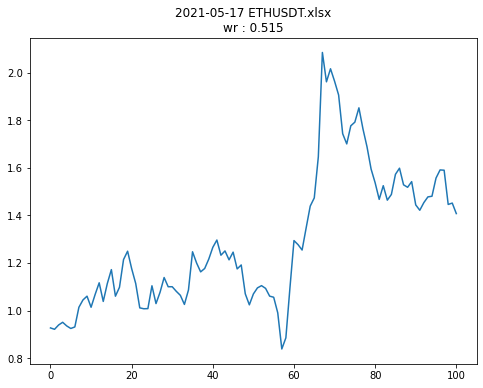

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### select target label

In [ ]:
try:
  input = train_x[0, :, target_label_index]
except:
  input = train_x[0, :, 0]  

label = train_y[0]

plt.plot(np.arange(len(input)), input,
          label='Inputs', marker='.', zorder=-10)    
plt.scatter(np.arange(len(label)) + input_size, label,
          edgecolors='k', label='Labels', c='#2ca02c', s=64)

plt.show()

In [ ]:
multi_val_performance = {}
multi_performance = {}

#### dense

In [ ]:
OUT_STEPS = label_size

multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

model_name = 'multi_step_macdhist_dense_macdhist_lscale_%s_%s_%s.h5' % (key, input_size, label_size)


In [ ]:
history = compile_and_fit(multi_dense_model, model_name)

IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['Dense'] = model.evaluate(val_x, val_y)
multi_performance['Dense'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 3.7937 - mean_absolute_error: 1.3819


##### check profit

In [ ]:
test_result = model.predict(test_x)

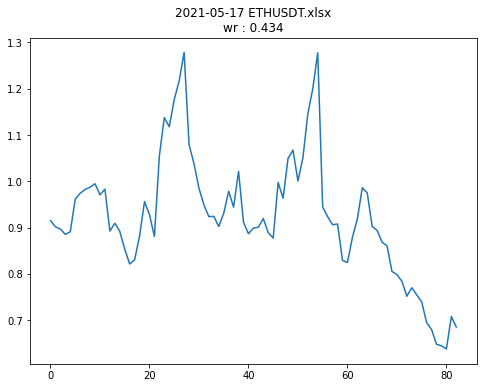

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### lstm

In [ ]:
OUT_STEPS = label_size

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

model_name = 'multi_step_macdhist_lstm_macdhist_lscale_%s_%s_%s.h5' % (key, input_size, label_size)


In [ ]:
history = compile_and_fit(multi_lstm_model, model_name)

IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['Dense'] = model.evaluate(val_x, val_y)
multi_performance['Dense'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 3ms/step - loss: 3.5484 - mean_absolute_error: 1.2996


##### check profit

In [ ]:
test_result = model.predict(test_x)

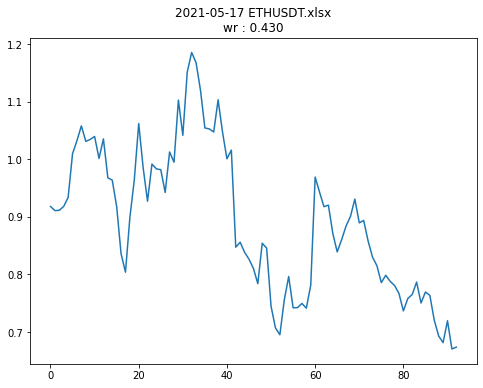

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### cnn 1d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
model_name = 'multi_step_macdhist_cnn1d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN1d'] = model.evaluate(val_x, val_y)
multi_performance['CNN1d'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 1s 13ms/step - loss: 0.9891 - mean_absolute_error: 0.7405


##### check profit

In [ ]:
test_result = model.predict(test_x)

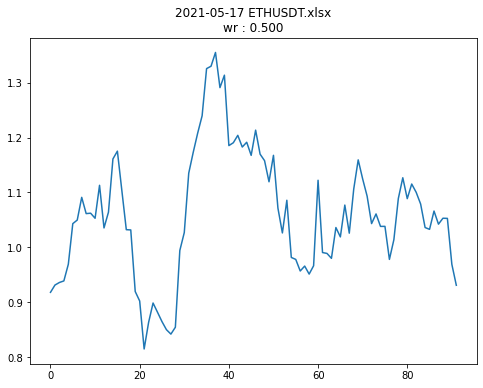

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### cnn 2d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv2D(256, activation='relu', kernel_size=(3)),
    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
# model_name = 'multi_step_macdhist_cnn2d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)
model_name = 'multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

Epoch 1/200
343/343 [==============================] - 64s 186ms/step - loss: 1.1681 - mean_absolute_error: 0.7786 - val_loss: 1.0932 - val_mean_absolute_error: 0.7604

Epoch 00001: val_loss improved from inf to 1.09318, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_2021-05-17 ETHUSDT.xlsx_96_24.h5
Epoch 2/200
343/343 [==============================] - 65s 188ms/step - loss: 1.0896 - mean_absolute_error: 0.7459 - val_loss: 1.0951 - val_mean_absolute_error: 0.7627

Epoch 00002: val_loss did not improve from 1.09318
Epoch 3/200
343/343 [==============================] - 64s 187ms/step - loss: 1.0517 - mean_absolute_error: 0.7305 - val_loss: 1.1023 - val_mean_absolute_error: 0.7542

Epoch 00003: val_loss did not improve from 1.09318
Epoch 4/200
343/343 [==============================] - 64s 186ms/step - loss: 1.0205 - mean_absolute_error: 0.7195 - val_loss: 1.0956 - val_mean_absolute_error: 0.7605

Epoch 00004: val_loss did 

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN'] = model.evaluate(val_x, val_y)
multi_performance['CNN'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 1.0011 - mean_absolute_error: 0.7511


##### check profit

In [ ]:
test_result = model.predict(test_x)

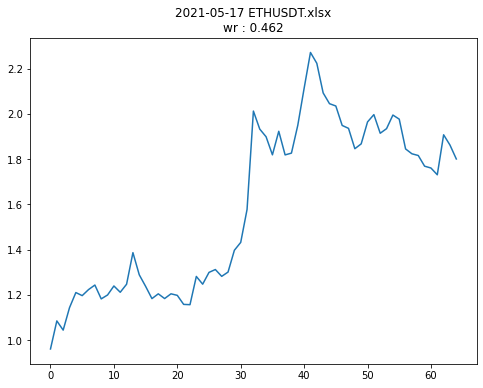

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### deep cnn 2d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv2D(32, activation='relu', kernel_size=(3)),
    tf.keras.layers.Conv2D(64, activation='relu', kernel_size=(3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, activation='relu', kernel_size=(3)),
    tf.keras.layers.Conv2D(256, activation='relu', kernel_size=(3)),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
# model_name = 'multi_step_macdhist_cnn2d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)
model_name = 'multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

Epoch 1/200
343/343 [==============================] - 64s 186ms/step - loss: 1.1681 - mean_absolute_error: 0.7786 - val_loss: 1.0932 - val_mean_absolute_error: 0.7604

Epoch 00001: val_loss improved from inf to 1.09318, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_2021-05-17 ETHUSDT.xlsx_96_24.h5
Epoch 2/200
343/343 [==============================] - 65s 188ms/step - loss: 1.0896 - mean_absolute_error: 0.7459 - val_loss: 1.0951 - val_mean_absolute_error: 0.7627

Epoch 00002: val_loss did not improve from 1.09318
Epoch 3/200
  4/343 [..............................] - ETA: 59s - loss: 0.8954 - mean_absolute_error: 0.6936

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN'] = model.evaluate(val_x, val_y)
multi_performance['CNN'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 1.0011 - mean_absolute_error: 0.7511


##### check profit

In [ ]:
test_result = model.predict(test_x)

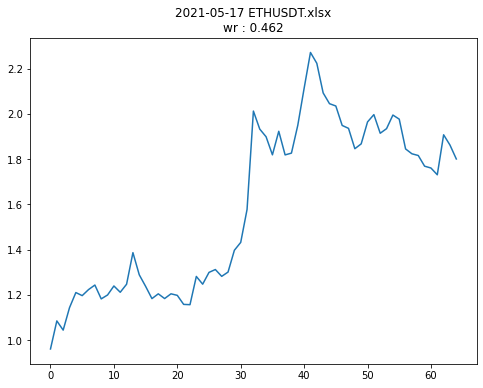

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### autoregressive

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

feedback_model = FeedBack(units=32, out_steps=label_size)

def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup
prediction, state = feedback_model.warmup(train_x)
prediction.shape

TensorShape([11022, 12])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call
print('Output shape (batch, time, features): ', feedback_model(train_x).shape)
# print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (11022, 24, 12)


In [ ]:
# history = compile_and_fit(feedback_model, multi_window)

model_name = 'multi_step_macdhist_ar_allfeature_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

history = compile_and_fit(feedback_model, model_name)

IPython.display.clear_output()

In [ ]:
# model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['AR'] = feedback_model.evaluate(val_x, val_y)
multi_performance['AR'] = feedback_model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 5ms/step - loss: 2.3948 - mean_absolute_error: 1.1002


##### check profit

In [ ]:
test_result = feedback_model.predict(test_x)

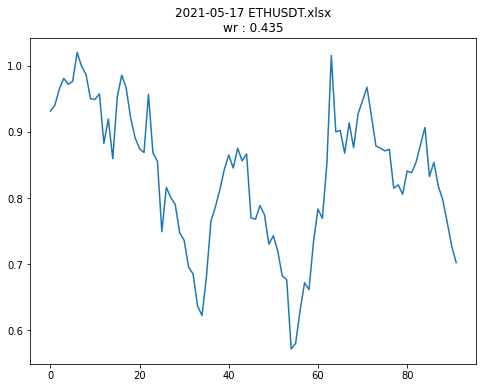

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### comparison

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Dense   : 1.8391
LSTM    : 1.9033
Conv    : 1.8230
AR LSTM : 2.3262
